## Day 23 Lecture 1 Assignment

In this assignment, we will explore feature selection and dimensionality reduction techniques. We will use both the FIFA ratings dataset and the Chicago traffic crashes dataset.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
crash_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/traffic_crashes_chicago.csv')
soccer_data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/fifa_ratings.csv')

In [3]:
soccer_data.head()

,ID,Name,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
0,158023,L. Messi,94,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26
1,20801,Cristiano Ronaldo,94,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23
2,190871,Neymar Jr,92,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33
3,192985,K. De Bruyne,91,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51
4,183277,E. Hazard,91,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22


We will begin with the Chicago traffic crashes dataset, focusing on removing columns with significant missing data.

Remove all columns with more than 5% missing data from the dataframe. (The *missingness summary* function we wrote a few exercises ago will speed this process up significantly.) Print out the columns that were removed, and the proportion of missing data for each column.

In [4]:
# answer goes here
dropped_columns = []
missing_val = (crash_data.isnull().sum())/len(crash_data)
"""
for d in crash_data:
  print(missing_val[d])
  if missing_val[d] > 0.05:
    dropped_columns.append(crash_data[d])
    crash_data = crash_data.drop(crash_data[d])"""
missing_val = pd.DataFrame(missing_val)

In [5]:
column_names = missing_val.index
percent_nan = []
dropped_columns = []
good_data = []

for m in range(len(missing_val)):
  percent_nan.append(missing_val[0][m])


In [6]:
for _ in range(len(percent_nan)):
  if percent_nan[_] > 0.05:
    dropped_columns.append(column_names[_])
  else:
    good_data.append(column_name[_])

In [7]:
crash_data = crash_data[good_data]

In [8]:
crash_data

,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN
0,JC334993,7/4/2019 22:33,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"OVER $1,500",7/4/2019 23:05,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,JC370822,7/30/2019 10:22,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"OVER $1,500",7/30/2019 10:25,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,JC387098,8/10/2019 17:00,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"$501 - $1,500",8/10/2019 17:35,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JC395195,8/16/2019 16:53,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"$501 - $1,500",8/16/2019 16:53,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,JC396604,8/17/2019 16:04,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,"$501 - $1,500",8/17/2019 18:30,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372580,JC378354,8/4/2019 15:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,NaN,INJURY AND / OR TOW DUE TO CRASH,"$501 - $1,500",8/4/2019 16:27,FAILING TO REDUCE SPEED TO AVOID CRASH,NOT APPLICABLE,4520,S,PULASKI RD,815.0,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,1.0,0.0
372581,JC406679,8/25/2019 13:07,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",8/25/2019 13:08,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5958,W,LAWRENCE AVE,1622.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0
372582,JC406342,8/25/2019 6:00,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,INJURY AND / OR TOW DUE TO CRASH,"OVER $1,500",8/25/2019 7:00,PHYSICAL CONDITION OF DRIVER,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,10400,S,MICHIGAN AVE,512.0,2.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,0.0,0.0
372583,JC386106,8/9/2019 21:24,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,"RUT, HOLES",ON SCENE,NO INJURY / DRIVE AWAY,"OVER $1,500",8/9/2019 21:24,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3806,N,KEDZIE AVE,1733.0,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,0.0


Next, we will shift our focus to the FIFA ratings dataset and explore univariate feature selection techniques. We will treat "Overall" as the response and the other ratings as features.

Using the correlations between the response and features, identify the 5 features with the greatest univariate correlation to the response.

In [25]:
soccer_data = soccer_data.drop(['ID','Name'], axis = 1)
df_corr = soccer_data.corr()
df_corr.head()



,Overall,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle
Overall,1.000000,0.496603,0.373079,0.466908,0.722720,0.452090,0.516363,0.503054,0.455875,0.585104,0.717933,0.150825,0.170155,0.244344,0.847739,0.059425,0.562960,0.228271,0.461417,0.341067,0.502109,0.452916,0.333275,0.438692,0.524361,0.391124,0.801749,0.305698,0.264082,0.224365
Crossing,0.496603,1.000000,0.413404,-0.134959,0.632386,0.472485,0.712261,0.714762,0.618580,0.592781,0.682796,0.439799,0.393403,0.547590,0.461861,0.435751,0.457531,-0.027529,0.351862,-0.177255,0.548462,0.105539,0.125985,0.585624,0.643948,0.371606,0.469666,0.086971,0.085429,0.078963
Finishing,0.373079,0.413404,1.000000,0.002099,0.398895,0.814663,0.706635,0.614189,0.537508,0.218965,0.645849,0.373630,0.349087,0.480792,0.349146,0.311487,0.703408,-0.057519,0.119415,-0.125550,0.803036,-0.201407,-0.491733,0.818964,0.655283,0.744835,0.412177,-0.503042,-0.558565,-0.585841
HeadingAccuracy,0.466908,-0.134959,0.002099,1.000000,0.131909,0.062357,-0.134535,-0.091652,-0.076517,0.057267,0.069890,-0.335712,-0.238734,-0.351398,0.405671,-0.467826,0.189628,0.357951,0.161594,0.641662,0.029784,0.458631,0.286880,-0.024105,-0.079291,0.108405,0.344770,0.274280,0.257420,0.234933
ShortPassing,0.722720,0.632386,0.398895,0.131909,1.000000,0.469096,0.638983,0.614810,0.584412,0.842294,0.800317,0.171664,0.140618,0.361314,0.658269,0.252552,0.556794,0.026758,0.375038,0.041784,0.575126,0.305331,0.287053,0.501792,0.724511,0.384587,0.673243,0.244696,0.235083,0.203009


Use sklearn's "SelectKBest" function to select the top 5 features using two different scoring metrics: f_regression and mutual_info_regression. Print out the top 5 columns that are selected by both. How do they compare to the ones selected by  univariate correlation?

In [26]:
# answer goes here
Y = soccer_data['Overall']
X = soccer_data.drop('Overall', axis=1)
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_regression
k = 5
kbest = SelectKBest(k=k, score_func=f_classif)

X_best_feature = kbest.fit_transform(X,Y)

X_best_feature = pd.DataFrame(X_best_feature, columns=X.columns[kbest.get_support()])

X_best_feature.columns



Index(['ShortPassing', 'LongPassing', 'BallControl', 'Reactions', 'Composure'], dtype='object')

In [27]:
k2=5
kbest2 = SelectKBest(k=k2, score_func=mutual_info_regression)
X_best_features2 = kbest2.fit_transform(X, Y)
X_best_features2 = pd.DataFrame(X_best_features2,
                               columns=X.columns[kbest2.get_support()])
X_best_features2.columns

Index(['ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure'], dtype='object')

Shifting our focus from feature selection to dimensionality reduction, perform PCA on the ratings provided, excluding "Overall". Then, answer the following questions:

- What percentage of the total variance is capture by the first component? What about the first two, or first three?
- Looking at the components themselves, how would you interpret the first two components in plain English?

In [28]:
# answer goes here
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

pca.explained_variance_ratio_[0]




0.39592940781178

In [29]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.6592488894166173

In [30]:
pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] + pca.explained_variance_ratio_[2]

0.7442938418340237

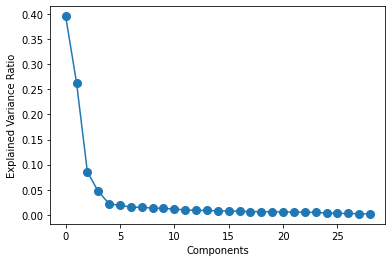

In [31]:
plt.plot(pca.explained_variance_ratio_,marker='o',markersize=8)
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.show()